<a href="https://colab.research.google.com/github/jungmin628/SummerWorkshop/blob/master/%EC%8B%A4%EC%8B%9C%EA%B0%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import drive
#구글 드라이브 연결
path = "/content/drive"
drive.mount(path)
#불러오기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
pp = "/cotent/drive/MyDrive/bike"

In [119]:
import pandas as pd
import numpy as np

In [120]:
train = pd.read_csv('/content/drive/MyDrive/bike/train.csv')
train
#학습데이터

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [121]:
test = pd.read_csv('/content/drive/MyDrive/bike/test.csv')
#예측데이터
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [122]:
#test.info()

In [123]:
#train.info()

In [124]:
train = train.drop('casual', axis = 1)
train = train.drop('registered', axis = 1)
#데이터 삭제 casual이랑 registered를 합친 것이 count라서 지워도 됨

season           AxesSubplot(0.125,0.657941;0.227941x0.222059)
holiday       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
workingday    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
weather          AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
atemp         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
humidity            AxesSubplot(0.125,0.125;0.227941x0.222059)
windspeed        AxesSubplot(0.398529,0.125;0.227941x0.222059)
count            AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

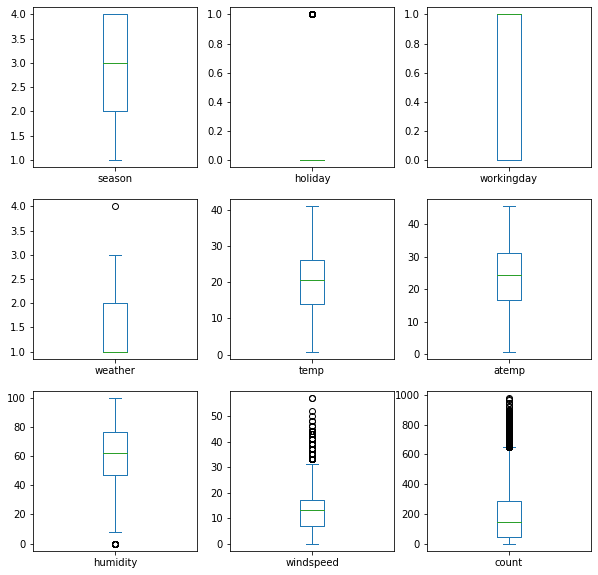

In [125]:
train.plot(kind = 'box',subplots = True, layout=(3,3),figsize=(10,10))
#데이터 분포 확인

season           AxesSubplot(0.125,0.657941;0.227941x0.222059)
holiday       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
workingday    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
weather          AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
atemp         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
humidity            AxesSubplot(0.125,0.125;0.227941x0.222059)
windspeed        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

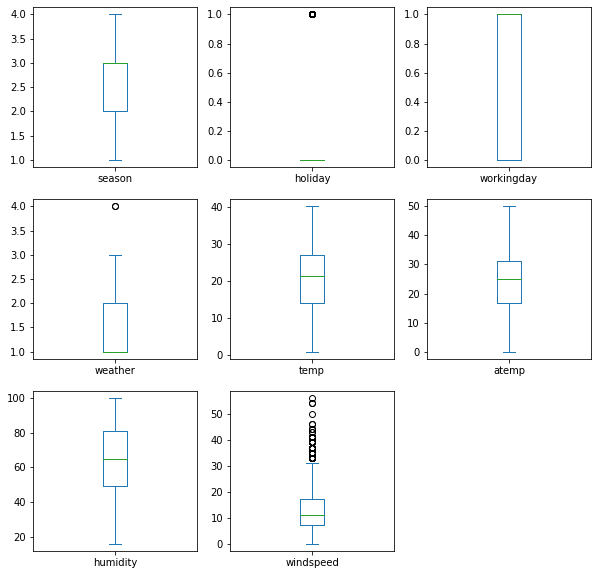

In [126]:
test.plot(kind = 'box',subplots = True, layout=(3,3),figsize=(10,10))

In [127]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [128]:
train = train.drop('datetime', axis=1)
test = test.drop('datetime',axis =1)

datetime을 제거하지 않고 유지해서 type 변경하는 방법 있음


In [129]:
#train.info()

In [130]:
#test.info()

In [131]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [132]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [152]:
train_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed']
#train.colums를 통해 똑같이 만들어줘야함.

In [153]:
train_pred = ['count']

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[train_list],train['count'],random_state= 42, test_size = 0.1)
#만개에 대한 데이터를 보고서 6천개의 데이터를 분석하라고 하면 힘들기 때문에 이 과정을 인공지능에게 넘겨줄 것이다.
#10886개가 있으면, 6000개 데이터로 간추려서 인공지능이 예측해야한다. 
#모델이 좋은지 나쁜지를 어떻게 구분할까? -> 학습데이터를 나눠줄 것이다. 학습데이터를 가지고 80:20 을 자르고 80을 가지고 학습을 하고 20을 가지고 평가하는 것이다.

In [155]:
x_train, y_train

(      season  holiday  workingday  weather   temp   atemp  humidity  windspeed
 8839       3        0           1        1  31.98  36.365        55    19.9995
 5594       1        0           0        2  13.12  16.665        49     7.0015
 5620       1        0           1        2   9.02  12.120        60     7.0015
 9837       4        0           0        1  16.40  20.455        82    11.0014
 4453       4        0           1        1  23.78  27.275        49    12.9980
 ...      ...      ...         ...      ...    ...     ...       ...        ...
 5734       1        0           0        1   6.56   8.335        47    11.0014
 5191       4        0           0        1  11.48  12.880        61    19.0012
 5390       4        0           0        1  11.48  13.635        48    16.9979
 860        1        0           0        1  15.58  19.695        17    35.0008
 7270       2        0           1        2  22.14  25.760        88    12.9980
 
 [9797 rows x 8 columns], 8839    467


In [156]:
x_test, y_test

(      season  holiday  workingday  weather   temp   atemp  humidity  windspeed
 3133       3        0           1        1  33.62  40.150        59     0.0000
 5786       1        1           0        1   4.10   6.820        54     6.0032
 5224       4        0           0        1   9.84  11.365        48    12.9980
 8953       3        0           1        2  29.52  34.090        62    12.9980
 8054       2        0           1        1  25.42  31.060        53    16.9979
 ...      ...      ...         ...      ...    ...     ...       ...        ...
 6886       2        0           1        1  14.76  16.665        46    22.0028
 4317       4        0           1        2  22.96  26.515        83    12.9980
 1373       2        0           0        1  10.66  13.635        70     8.9981
 5400       4        0           1        1   7.38  10.605        80     6.0032
 2312       2        0           0        1  22.14  25.760        60     0.0000
 
 [1089 rows x 8 columns], 3133    127


In [157]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#분류문제와 숫자예측에 따라서 Regressor와 Classifier 형식이 달라짐

In [158]:
from xgboost import XGBClassifier

In [159]:
y_test

3133    127
5786     13
5224    163
8953    233
8054    222
       ... 
6886    126
4317    147
1373     24
5400      3
2312     28
Name: count, Length: 1089, dtype: int64

In [160]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_train, y_train)
#트레이닝 과정
pred = model.predict(x_test)
pred.shape

[09:05:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(1089,)

In [161]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train)

[09:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.33079821, 0.33426588, 0.33270763, 0.30997576, 0.33797464])

In [162]:
rmise = 0
print(pred)
print(y_test)
print("-------------")
for tr, ts in zip(pred, y_test):
  # print(tr, ts)
  rmise += np.sqrt((np.log(tr+1)-np.log(ts+1))**2)
  print(rmise)
  #홈페이지에 있는 수식을 쓰는 것임
print(rmise)
print(rmise/1089)

[266.17737   27.402487 125.80544  ...  40.59873   89.043816 170.24564 ]
3133    127
5786     13
5224    163
8953    233
8054    222
       ... 
6886    126
4317    147
1373     24
5400      3
2312     28
Name: count, Length: 1089, dtype: int64
-------------
0.7358824741708316
1.4433018493099663
1.700514311682717
1.8529292379498745
2.1020429925367257
2.2219182007798173
2.7429472869342044
2.779708574100919
4.2141700252363945
4.859713545416543
6.763235689471205
9.050637741866174
9.37720672767529
10.011956906483592
11.03910578808019
13.499961740838827
13.868779461968924
14.65074561098229
15.489997706803752
18.314910993739804
18.673050873103097
19.32418753115798
22.10200195632773
22.332659352151772
24.78212904034749
28.688768930430115
29.043748615246294
31.060670651073124
31.740349394752165
34.45467605781557
34.45677203132299
34.52703086885043
34.54764464679616
35.34309013756163
35.35336507429133
38.39503732662792
39.01424150027681
39.51736594033159
39.66798412880973
40.44951582709043
40.64

In [144]:
y_test

3133    127
5786     13
5224    163
8953    233
8054    222
       ... 
6886    126
4317    147
1373     24
5400      3
2312     28
Name: count, Length: 1089, dtype: int64

In [145]:
pred.shape

(1089,)

In [146]:
pred = model.predit()

AttributeError: ignored

In [ ]:
for r in test:
  if r<0:
    print(r)